<a href="https://colab.research.google.com/github/ravidkrisi/Deep-Learning-Introduction/blob/main/linear_model_and_neural_network_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### import data from Kaggle

note: I have created a notebook that explains how to import dataset from Kaggle to Google Colab.in this notebook I have used a diffrent way, in order to download the dataset from Kaggle I used to first method in [this](https://www.kaggle.com/discussions/general/51898) forum. so you need to get API token from Kaggle account and import it to this notebook in order to run this notebook.

sub

first we will import all data needed to create neural net for Titanic problem:

In [146]:
! pip install -q kaggle

Make directory named kaggle and copy kaggle.json file there:

In [147]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Change the permissions of the file:

In [148]:
! chmod 600 ~/.kaggle/kaggle.json

check if everything's okay by running this command:

In [149]:
! kaggle datasets list

ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/global-youtube-statistics-2023                     Global YouTube Statistics 2023                       60KB  2023-07-28 15:36:38           6600        224  1.0              
nelgiriyewithana/countries-of-the-world-2023                        Global Country Information Dataset 2023              23KB  2023-07-08 20:37:33          13855        548  1.0              
brunoalarcon123/top-200-spotify-songs-dataset                       Top 200 Spotify Songs Dataset                        35MB  2023-08-18 05:36:12           1980         67  1.0              
ishanshrivastava28/tata-online-retail-da

download titanic competition dataset:

In [150]:
! kaggle competitions download -c 'titanic'

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


unzip dataset:

In [151]:
! unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### import pyTorch Numpy and Pandas

In [152]:
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

### prepare the data

#### handle null values

This is a *tabular data* competition -- the data is in the form of a table. It's provided as a Comma Separated Values (CSV) file. We can open it using the *pandas* library, which will create a `DataFrame`.

In [153]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


our *features* are the *columns* of the data. as we learned before about neural nets that each *feature* multiply with corresponding *cofficient*. as we can see some *features* hold `null` values. so we need to redefine them with something we can multiply with.

`isna()` return *true* which means *1*. `sum()` sum all the rows had `NaN`(null)

In [154]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

so we will replace every *null* value with the most common value existing in the *column*

- `mode()`: return pandas Series object of the most common value in each column. if there is a tie it returns more than one value.
- `iloc[0]`: returns the first row in `modes` which is the a pandas series object that contain the modes of each column. we will take the first row in case there was a tie between values in the `mode` function.  

In [155]:
modes = df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

now that we have the mode of each column we will replace each *null* values with its corresponding *mode*.

- `fillna()`- replace missing (NaN) values in a DataFrame or Series with specified values or using various filling methods
- `value=modes`- we will pass as an argument for value the modes data series we created that will replace all `NaN` values.
- `inplace=`- use this parameter means that it will overwrite the dataframe over the existing dataframe and not create a new one.


In [156]:
df.fillna(value=modes, inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


now we can check our work is done correctly and there is no *null* values

In [157]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#### handle long tail

- `describe()`- function in pandas is used to generate descriptive statistics of a DataFrame or Series. It provides a summary of the central tendency, dispersion, and distribution of the data, giving you a quick overview of the data's characteristics
- `include=` - use this parameter to select specfic data type to include from the summary statics. here we chose only numeric type data.

In [158]:
df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


we will use `hist()` function to create *histogram* graph.

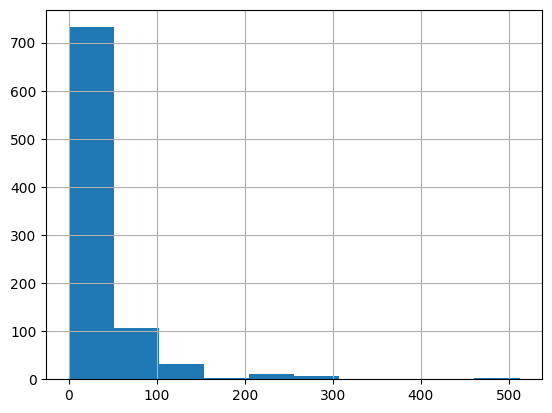

In [159]:
df['Fare'].hist();

as we can see the *fare* column range mostly between 0-30. but we have some rows that has really big values. when we will multipy the rows with the big values with the cofficient, the big values will dominate the result.

in order to prevent that we will use log on the *fare* values. because $log(0) = ∞$ we will add one to each fare value. we will sotre the new values in new `LogFare` column

In [160]:
df['LogFare'] = np.log(df['Fare']+1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LogFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S,2.639057
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,3.433987
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,B96 B98,S,3.196630
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,3.433987


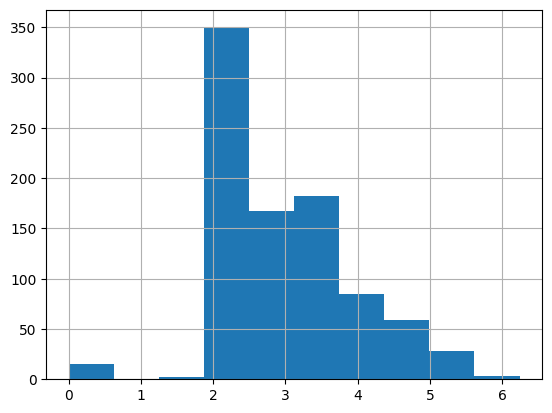

In [161]:
df['LogFare'].hist();


The histogram now shows a more even distribution of values without the long tail

#### handle non-numeric features

this is how we get a quick summary of non-numeric data:

In [162]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


we can't multiply coffiecients with non-numeric values. so we need to replace it with numeric corresponding value.

one method of doing it is by add a *dummy column* for each value in a colum where *1* mean the value exist and *0* means it doesnt. we will do it using `get_dummies()` function in pandas which also removes the original columns.

In [163]:
df = pd.get_dummies(df, columns=["Sex","Pclass","Embarked"])
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

now we can create our independent variable-*features* and our dependent variable-*label*. they both have to pyTorch tensors.

our dependent variable is `survived`:

In [164]:
from torch import tensor

t_Y = tensor(df.Survived)

Our independent variables are all the continuous variables of interest plus all the dummy variables we just created:

In [165]:
cont_col = ['Age', 'SibSp', 'Parch', 'LogFare']
dummy_col = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X_test = cont_col + dummy_col

t_X = tensor(df[X_test].values, dtype=torch.float)
t_X

tensor([[22.0000,  1.0000,  0.0000,  2.1102,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [38.0000,  1.0000,  0.0000,  4.2806,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [26.0000,  0.0000,  0.0000,  2.1889,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  1.0000,  0.0000,  3.9908,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  0.0000,  0.0000,  2.2028,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [24.0000,  0.0000,  0.0000,  2.2469,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [54.0000,  0.0000,  0.0000,  3.9677,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        ...,
        [25.0000,  0.0000,  0.0000,  2.0857,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [39.0000,  0.0000,  5.0000,  3.4054

`shape` attribute retrieve the dimensions of a tensor

In [166]:
print(t_X.shape)

torch.Size([891, 12])


so as we can we have 891 rows and 12 columns. each column represent a feature

### setting up a linear model

In this section, we're going to manually do a single step of calculating predictions and loss for every row of our data. we need a cofficient for each column in the independent columns- `t_X`. we will pick random cofficient for each one in the range of `(-0.5, 0.5)`

- `manual_seed()`- set the seed for the random number generator.
- `torch.rand()`- is a function that generates a tensor with random values drawn from a uniform distribution between 0 and 1. the passed value indicates the dimensions of the created tensor.

In [167]:
torch.manual_seed(442)

n_coeff = t_X.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625])

Here's what the multiplication looks like:

In [168]:
t_X*coeffs

tensor([[-10.1838,   0.1386,   0.0000,  -0.4772,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-17.5902,   0.1386,   0.0000,  -0.9681,  -0.0000,  -0.3147,   0.4876,   0.0000,   0.0000,  -0.4392,   0.0000,   0.0000],
        [-12.0354,   0.0000,   0.0000,  -0.4950,  -0.0000,  -0.3147,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-16.2015,   0.1386,   0.0000,  -0.9025,  -0.0000,  -0.3147,   0.4876,   0.0000,   0.0000,  -0.0000,   0.0000,   0.3625],
        [-16.2015,   0.0000,   0.0000,  -0.4982,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-11.1096,   0.0000,   0.0000,  -0.5081,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.2103,   0.0000],
        [-24.9966,   0.0000,   0.0000,  -0.8973,  -0.2632,  -0.0000,   0.4876,   0.0000,   0.0000,  -0.0000,   0.0000,   0.3625],
        ...,
        [-11.5725,   0.0000,   0.0000,  -0.4717,  -0.2632,  -0.0000,   0.0000

as we can see our sum of each row will be dominated by the `age` column.
to deal with it Let's make all the columns contain numbers from `0` to `1`, by dividing each column by its `max()`:

`max()`- find the maximum value in a tensor along with its corresponding index (position) within the tensor. `dim=` indicates the dimension along you want to find the max value(here its `age` column).

In [169]:
vals,indices = t_X.max(dim=0)
print(vals)
t_X = t_X / vals
print(t_X)

tensor([80.0000,  8.0000,  6.0000,  6.2409,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000])
tensor([[0.2750, 0.1250, 0.0000, 0.3381, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [0.4750, 0.1250, 0.0000, 0.6859, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000],
        [0.3250, 0.0000, 0.0000, 0.3507, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [0.4375, 0.1250, 0.0000, 0.6395, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [0.4375, 0.0000, 0.0000, 0.3530, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [0.3000, 0.0000, 0.0000, 0.3600, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000],
        [0.6750, 0.0000, 0.0000, 0.6358, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        ...,
        [0.3125, 0.0000, 0.0000, 0.3342, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [0.4875, 0.000

now we can see the column of `age` doesnt dominate the sum of each row:

In [170]:
t_X*coeffs

tensor([[-0.1273,  0.0173,  0.0000, -0.0765, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2199,  0.0173,  0.0000, -0.1551, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.4392,  0.0000,  0.0000],
        [-0.1504,  0.0000,  0.0000, -0.0793, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0173,  0.0000, -0.1446, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0000,  0.0000, -0.0798, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.1389,  0.0000,  0.0000, -0.0814, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.2103,  0.0000],
        [-0.3125,  0.0000,  0.0000, -0.1438, -0.2632, -0.0000,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        ...,
        [-0.1447,  0.0000,  0.0000, -0.0756, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2257,  0.0000,  0.2008, -0.1234

we can now sum the product of each row:

In [171]:
preds = (t_X*coeffs).sum(axis=1)
preds

tensor([     0.1927,     -0.6239,      0.0979,      0.2056,      0.0968,      0.0066,      0.1306,      0.3476,      0.1613,     -0.6285,
             0.2579,      0.0796,      0.1836,      0.2457,      0.1676,     -0.0595,      0.2014,      0.1783,      0.0589,     -0.6892,
             0.0909,      0.1205,      0.0089,      0.2945,      0.2614,      0.1999,     -0.6378,      0.4071,     -0.0425,      0.1611,
            -0.5679,     -0.5688,     -0.0420,     -0.0576,     -0.5197,      0.2173,     -0.6378,      0.1778,      0.1515,     -0.6284,
             0.0284,      0.1104,     -0.6406,     -0.4960,     -0.0136,      0.1605,      0.0038,     -0.0420,     -0.6399,      0.1345,
             0.3138,      0.1788,     -0.6902,      0.0915,     -0.7009,      0.3176,      0.1514,     -0.6638,      0.3084,      0.3422,
            -0.6262,      0.1563,      0.1831,      0.3664,     -0.4753,     -0.6049,      0.1051,      0.1890,      0.2996,      0.1812,
             0.1392,      0.2618, 

of coure our predications we found are aribtary, because we used random cofficient. in order to make our model more accourate we need to find the best cofficients- we'll do with gradient descent.

to do gradient descent we need loss function. taking the average error of the rows can be a proper approach:

In [172]:
loss = torch.abs(preds-t_Y).mean()
loss

tensor(0.5382)

we want to minimize the number above as much as possible.

Now that we've tested out a way of calculating predictions, and loss, let's pop them into functions to make life easier:

In [173]:
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

### Doing a gradient descent step

In this section, we're going to do a single "epoch" of gradient descent manually. we are going to use `required_grad()` function from pyTorch on our cofficients in order to automate the process calculating gradients.

In [174]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

Now when we calculate our loss, PyTorch will keep track of all the steps, so we'll be able to get the gradients afterwards:


In [175]:
loss = calc_loss(coeffs, t_X, t_Y)
loss

tensor(0.5382, grad_fn=<MeanBackward0>)

`backward()`- when you call this function on tensor the represents the loss function, PyTorch calculates gradients of the loss with respect to the tensors that were used in the operations leading to the loss.

In [176]:
loss.backward()

`.grad`- stores the gradients of the `loss` with respect to the `coeffs` tensor

In [177]:
coeffs.grad

tensor([-0.0106,  0.0129, -0.0041, -0.0484,  0.2099, -0.2132, -0.1212, -0.0247,  0.1425, -0.1886, -0.0191,  0.2043])

As you see, our `.grad` values are have doubled. That's because it added the gradients a second time. For this reason, after we use the gradients to do a gradient descent step, we need to set them back to zero.

In [178]:
loss = calc_loss(coeffs, t_X, t_Y)
loss.backward()
coeffs.grad

tensor([-0.0212,  0.0258, -0.0082, -0.0969,  0.4198, -0.4265, -0.2424, -0.0494,  0.2851, -0.3771, -0.0382,  0.4085])

We can now do one gradient descent step, and check that our loss decreases:
- `no_grad()`- a context manager provided by PyTorch that allows you to perform operations within a context where gradients are not calculated or stored.
- `a.sub_(b)` subtracts `b` from `a` in-place. In PyTorch, any method that ends in `_` changes its object in-place.
- `grad.zero()`- it's used to zero out the gradients stored in the `.grad` attribute of a tensor.

In [179]:
loss = calc_loss(coeffs, t_X, t_Y)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_X, t_Y))

tensor(0.4945)


### Training the linear model

now we want to to split our data to training and  validation set.
we will use `randomSplitter` to get indices that will split our data into training and validation.

In [180]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

now we will use the indices we got to split the independent and dependent variables:

In [181]:
trn_indep,val_indep = t_X[trn_split],t_X[val_split]
trn_dep,val_dep = t_Y[trn_split],t_Y[val_split]
len(trn_indep),len(val_indep)

(713, 178)

We'll create functions for the three things we did manually above: updating coeffs, doing one full gradient descent step, and initilising coeffs to random numbers:

In [182]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

In [183]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [184]:
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

now can train our model we will create function that gets as parametes the numbers of epochs and the learning rate:

In [185]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

lets try it out:

In [186]:
coeffs = train_model(18, lr=0.2)

0.536; 0.502; 0.477; 0.454; 0.431; 0.409; 0.388; 0.367; 0.349; 0.336; 0.330; 0.326; 0.329; 0.304; 0.314; 0.296; 0.300; 0.289; 

as we can see above in the output the loss has decreased

let's create function that will show the coefficent for every column:

In [187]:
def show_coeffs(): return dict(zip(X_test, coeffs.requires_grad_(False)))
show_coeffs()

{'Age': tensor(-0.2694),
 'SibSp': tensor(0.0901),
 'Parch': tensor(0.2359),
 'LogFare': tensor(0.0280),
 'Sex_male': tensor(-0.3990),
 'Sex_female': tensor(0.2345),
 'Pclass_1': tensor(0.7232),
 'Pclass_2': tensor(0.4112),
 'Pclass_3': tensor(0.3601),
 'Embarked_C': tensor(0.0955),
 'Embarked_Q': tensor(0.2395),
 'Embarked_S': tensor(0.2122)}

### measuring accuracy

our model score based on the accuracy we preform on the validation set. so lets calculate the predictions:

In [188]:
preds = calc_preds(coeffs, val_indep)
len(preds)

178

every predictions with a score over `0.5` is predicted to survive. So that means we're correct for each row where `preds>0.5` is the same as the dependent variable `survived`- `true` and we're correct where `preds<=0.5` and dependent variable is `not survived`- `false`.

- `.bool()` - method on a tensor will create a new tensor with the same shape as the original tensor, but the data type of the elements in the new tensor will be set to `bool`.

In [189]:
results = val_dep.bool()==(preds>0.5)
results[:16]

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False, False, False,  True,  True, False])

Let's see what our average accuracy is:

In [190]:
results.float().mean()

tensor(0.7865)

lets create a function that get as argument the coefficents and return the accourcy of the corresponding model:

In [191]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.7865)

### Using Sigmoid

looking at our prediction we have calculated using the model we trained, we see that we have predictions that are `preds<0` or `1<preds`

In [192]:
preds[:28]

tensor([ 0.8160,  0.1295, -0.0148,  0.1831,  0.1520,  0.1350,  0.7279,  0.7754,  0.3222,  0.6740,  0.0753,  0.0389,  0.2216,  0.7631,
         0.0678,  0.3997,  0.3324,  0.8278,  0.1078,  0.7126,  0.1023,  0.3627,  0.9937,  0.8050,  0.1153,  0.1455,  0.8652,  0.3425])

to fix this we will pass every prediction through the [*sigmoid function*](https://en.wikipedia.org/wiki/Sigmoid_function), it has a minimum value at 0 and max value at 1.

PyTorch already defines that function for us, so we can modify `calc_preds` to use it:

In [193]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))

lets train a new model now when `calc_preds` using the *sigmoid function*

In [194]:
coeffs = train_model(lr=100)

0.510; 0.327; 0.294; 0.207; 0.201; 0.199; 0.198; 0.197; 0.196; 0.196; 0.196; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 

lets check the accuracy of the model:

In [195]:
acc(coeffs)

tensor(0.8258)

lets see the coeffs with their corresponding column:

In [196]:
show_coeffs()

{'Age': tensor(-1.5061),
 'SibSp': tensor(-1.1575),
 'Parch': tensor(-0.4267),
 'LogFare': tensor(0.2543),
 'Sex_male': tensor(-10.3320),
 'Sex_female': tensor(8.4185),
 'Pclass_1': tensor(3.8389),
 'Pclass_2': tensor(2.1398),
 'Pclass_3': tensor(-6.2331),
 'Embarked_C': tensor(1.4771),
 'Embarked_Q': tensor(2.1168),
 'Embarked_S': tensor(-4.7958)}

the coefficients above make sense. the rate of `male` passangers that survive is right hence it has big negative coefficent on the other side most `female` passangers survived so the likelyhood of a female passanger to survive is high hence the coefficent is high positive value.

### Submitting to Kaggle

now that we have created a model and trained it we can prepare a submittion to Kaggle. to do that, first we need to read the test set:

In [197]:
tst_df = pd.read_csv('test.csv')

one person of the test set missing `fare`. we will fill it with zero to avoid problems:

In [198]:
tst_df['Fare'] = tst_df.Fare.fillna(0)

now we can do the same preprocess steps we did before the the training set:

In [199]:
tst_df.fillna(modes, inplace=True)
tst_df['LogFare'] = np.log(tst_df['Fare']+1)
tst_df = pd.get_dummies(tst_df, columns=["Sex","Pclass","Embarked"])

tst_indep = tensor(tst_df[X_test].values, dtype=torch.float)
tst_indep = tst_indep / vals

lets calculate the predictions for the test set using the model we created and trained:

In [200]:
tst_df['Survived'] = (calc_preds(tst_indep, coeffs)>0.5).int()

The sample submission on the Kaggle competition site shows that we're expected to upload a CSV with just `PassengerId` and `Survived`, so let's create that and save it:
- `.to_csv()`- converts DataFrame to CSV file.
- `index=`- determines whether the index column of the DataFrame will be included in the output CSV file

In [201]:
sub_df = tst_df[['PassengerId','Survived']]
sub_df.to_csv('sub.csv', index=False)

we can see file has created in the folder tab. lets check the first rows to see if it looks reasonable:

In [202]:
!head sub.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
896,0
897,0
898,1
899,0
900,1


### using matrix product

we can simlify the code of calculation the predictions `(val_indep*coeffs).sum(axis=1)`. we can see it as matrix-vector product. python has built in matrix product feature- as well pyTorch can handle matrix product. it also can reduce time hence matrix product in pyTorch are very highly optimised.
- `@`- indicates on matrix product in python
so we can do this:  

In [203]:
val_indep@coeffs

tensor([ 12.3288, -14.8119, -15.4540, -13.1513, -13.3511, -13.6468,   3.6248,   5.3429, -22.0878,   3.1233, -21.8742, -15.6421, -21.5504,
          3.9393, -21.9190, -12.0010, -12.3775,   5.3550, -13.5880,  -3.1015, -21.7237, -12.2081,  12.9767,   4.7427, -21.6525, -14.9135,
         -2.7433, -12.3210, -21.5886,   3.9387,   5.3890,  -3.6196, -21.6296, -21.8454,  12.2159,  -3.2275, -12.0289,  13.4560, -21.7230,
         -3.1366, -13.2462, -21.7230, -13.6831,  13.3092, -21.6477,  -3.5868, -21.6854, -21.8316, -14.8158,  -2.9386,  -5.3103, -22.2384,
        -22.1097, -21.7466, -13.3780, -13.4909, -14.8119, -22.0690, -21.6666, -21.7818,  -5.4439, -21.7407, -12.6551, -21.6671,   4.9238,
        -11.5777, -13.3323, -21.9638, -15.3030,   5.0243, -21.7614,   3.1820, -13.4721, -21.7170, -11.6066, -21.5737, -21.7230, -11.9652,
        -13.2382, -13.7599, -13.2170,  13.1347, -21.7049, -21.7268,   4.9207,  -7.3198,  -5.3081,   7.1065,  11.4948, -13.3135, -21.8723,
        -21.7230,  13.3603, -15.56

lets use this int `calc_preds` function:

In [204]:
def calc_preds(coeffs, indeps): return torch.sigmoid(indeps@coeffs)
val_indep

tensor([[0.3000, 0.0000, 0.0000, 0.4152, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000],
        [0.3000, 0.0000, 0.0000, 0.3473, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000],
        [0.3000, 0.0000, 0.0000, 0.3377, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000],
        [0.2250, 0.0000, 0.0000, 0.6907, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [0.3125, 0.0000, 0.0000, 0.4229, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [0.4250, 0.1250, 0.0000, 0.4953, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [0.0500, 0.0000, 0.1667, 0.4276, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000],
        ...,
        [0.2375, 0.0000, 0.0000, 0.4392, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [0.2750, 0.1250, 0.0000, 0.6752, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [0.3000, 0.0000, 0.0000, 

In order to do matrix-matrix products (which we'll need in the next section), we need to turn `coeffs` into a column vector (i.e. a matrix with a single column), which we can do by passing a second argument `1` to `torch.rand()`, indicating that we want our coefficients to have one column:

In [205]:
def init_coeffs(): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()

We'll also need to turn our dependent variable into a column vector, which we can do by indexing the column dimension with the special value `None`, which tells PyTorch to add a new dimension in this position:

In [206]:
trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]

We can now train our model as before and confirm we get identical outputs...:

In [207]:
coeffs = train_model(lr=100)

0.512; 0.323; 0.290; 0.205; 0.200; 0.198; 0.197; 0.197; 0.196; 0.196; 0.196; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 

and identical accuracy:

In [208]:
acc(coeffs)

tensor(0.8258)

### A Neural Network

We've now got what we need to implement our neural network.

First, we'll need to create coefficients for each of our layers. Our first set of coefficients will take our `n_coeff` inputs, and create `n_hidden` outputs. We can choose whatever `n_hidden` we like -- a higher number gives our network more flexibility, but makes it slower and harder to train. So we need a matrix of size `n_coeff` by `n_hidden`. We'll divide these coefficients by `n_hidden` so that when we sum them up in the next layer we'll end up with similar magnitude numbers to what we started with.

Then our second layer will need to take the `n_hidden` inputs and create a single output, so that means we need a `n_hidden` by `1` matrix there. The second layer will also need a constant term added.

In [218]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

Now we have our coefficients, we can create our neural net. The key steps are the two matrix products, `indeps@l1` and `res@l2` (where `res` is the output of the first layer). The first layer output is passed to `F.relu` (that's our non-linearity), and the second is passed to `torch.sigmoid` as before.

In [219]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

Finally, now that we have more than one set of coefficients, we need to add a loop to update each one:


In [220]:
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

now we ready to train our model:

In [221]:
coeffs = train_model(lr=1.4)

0.543; 0.532; 0.520; 0.505; 0.487; 0.466; 0.439; 0.407; 0.373; 0.343; 0.319; 0.301; 0.286; 0.274; 0.264; 0.256; 0.250; 0.245; 0.240; 0.237; 0.234; 0.231; 0.229; 0.227; 0.226; 0.224; 0.223; 0.222; 0.221; 0.220; 

In [222]:
coeffs = train_model(lr=20)

0.543; 0.400; 0.260; 0.390; 0.221; 0.211; 0.197; 0.195; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 

lets check the accuracy:

In [223]:
acc(coeffs)

tensor(0.8258)

In this case our neural net isn't showing better results than the linear model. That's not surprising; this dataset is very small and very simple, and isn't the kind of thing we'd expect to see neural networks excel at. Furthermore, our validation set is too small to reliably see much accuracy difference. But the key thing is that we now know exactly what a real neural net looks like!

### deep learning

in the previous section the neural net we created is not "deep" learning as it only has one hidden layer. but we can use the exact same technique to add more layers by adding more matrix multiplication:

In [224]:
def init_coeffs():
    hiddens = [10, 10]  # <-- set this to the size of each hidden layer you want
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers,consts

lets redifine `calc_preds` func to loop through each layer instead of listing them separtly:

In [225]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers,consts = coeffs
    n = len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.relu(res)
    return torch.sigmoid(res)

We also need a minor update to `update_coeffs` since we've got `layers` and `consts` separated now:

In [227]:
def update_coeffs(coeffs, lr):
    layers,consts = coeffs
    for layer in layers+consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

lets train our model:

In [238]:
coeffs = train_model(lr=0.6)

0.521; 0.466; 0.425; 0.383; 0.352; 0.328; 0.305; 0.283; 0.266; 0.254; 0.245; 0.239; 0.234; 0.230; 0.228; 0.225; 0.223; 0.222; 0.221; 0.219; 0.218; 0.217; 0.216; 0.215; 0.215; 0.214; 0.213; 0.212; 0.211; 0.210; 

check the accuracy:

In [240]:
acc(coeffs)

tensor(0.8258)